**Definisi Text Preprocessing**

Pada natural language processing (NLP), informasi yang akan digali berisi data-data yang strukturnya “sembarang” atau tidak terstruktur. Oleh karena itu, diperlukan proses pengubahan bentuk menjadi data yang terstruktur untuk kebutuhan lebih lanjut (sentiment analysis, topic modelling, dll).

**Definisi NLTK (Natural Language ToolKit)**

Natural Language Toolkit atau disingkat NLTK, adalah libray python untuk bekerja dengan permodelan teks. NLTK menyediakan alat yang baik mempersiapkan teks sebelum digunakan pada machine learning atau algoritma deep learning. Cara termudah untuk menginstall NLTK adalah menggunakan

ada beberapa tahapan pemrosesan di NLP diantaranya dalah sebagai berikut :



In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.

True

In [2]:
sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."

In [29]:
sentence2 = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

In [3]:
print(sentence)

At eight o'clock on Thursday morning Arthur didn't feel very good.


1. **Tokenizing**
   
   Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat.


In [4]:
tokens = nltk.word_tokenize(sentence)

In [5]:
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)

In [16]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [18]:
tokens = nltk.tokenize.word_tokenize(sentence)
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('At', 1), ('eight', 1), ("o'clock", 1), ('on', 1), ('Thursday', 1), ('morning', 1), ('Arthur', 1), ('did', 1), ("n't", 1), ('feel', 1), ('very', 1), ('good', 1), ('.', 1)]


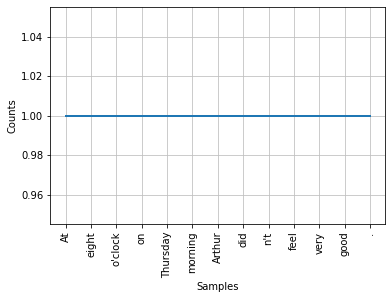

In [20]:
import matplotlib.pyplot as plt
kemunculan.plot(30,cumulative=False)
plt.show()

2. **Stopword Removal (Filtering)**

  Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

  Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

  Contoh penggunaan filtering dapat kita temukan pada konteks mesin pencarian. Jika permintaan pencarian anda adalah “apa itu pengertian manajemen?” tentunya anda ingin sistem pencarian fokus pada memunculkan dokumen dengan topik tentang “pengertian manajemen” di atas dokumen dengan topik “apa itu”. Hal ini dapat dilakukan dengan mencegah kata dari daftar stopword dianalisa.

In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [30]:
tokens = word_tokenize(sentence2)
listStopword =  set(stopwords.words('indonesian'))

In [31]:
removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)

In [33]:
print(removed)

['Andi', 'kerap', 'transaksi', 'rutin', 'daring', 'online', '.', 'Menurut', 'Andi', 'belanja', 'online', 'praktis', '&', 'murah', '.']


**3. Stemming**

  Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar”.

  Idenya adalah ketika anda mencari dokumen “cara membuka lemari”, anda juga ingin melihat dokumen yang menyebutkan “cara terbuka lemari” atau “cara dibuka lemari” meskipun terdengar tidak enak. Tentunya anda ingin mencocokan semua variasi kata untuk memunculkan dokumen yang paling relevan.

In [38]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [42]:
sentence3 = ["disable", "disabler", "disabled", "disabling"]

In [44]:
for i in sentence3: 
    print(i, " : ", ps.stem(i))

disabler  :  disabl
disabled  :  disabl
disabling  :  disabl
